In [113]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_pareto_curve(baseline_data, energy_data, l1_data, ppce_data, rrr_data, x_label='F1 Score (%)', y_label='EPG Score (%)', title='Pareto Curve', save_path=None):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot Baseline
    ax.plot(baseline_data[0], baseline_data[1], marker='X', color='white', markersize=10, markeredgewidth=2, markeredgecolor='black', label='Baseline')

    # Dominated region (gray)
    ax.plot([0, baseline_data[0]], [baseline_data[1], baseline_data[1]], '--', color='gray', alpha=0.5)
    ax.plot([baseline_data[0], baseline_data[0]], [-20, baseline_data[1]], '--', color='gray', alpha=0.5)
    ax.fill_between([baseline_data[0], -20], [baseline_data[1], baseline_data[1]], [-20, -20], color='gray', alpha=0.1)

    # Dominating region (green)
    ax.plot([baseline_data[0], 120], [baseline_data[1], baseline_data[1]], '--', color='green', alpha=0.5)
    ax.plot([baseline_data[0], baseline_data[0]], [120, baseline_data[1]], '--', color='green', alpha=0.5)
    ax.fill_between([120, baseline_data[0]], [baseline_data[1], baseline_data[1]], [120, 120], color='green', alpha=0.1)

    # Energy
    if energy_data:
        energy_x, energy_y = zip(*energy_data)
        ax.scatter(energy_x, energy_y, marker='o', color='#FF006F', label='Energy', s=100, edgecolors='black')
        ax.plot(energy_x, energy_y, color='#FF006F', linestyle='--')

    # L1
    if l1_data:
        l1_x, l1_y = zip(*l1_data)
        ax.scatter(l1_x, l1_y, marker='v', color='#00E49F', label='L1', s=100, edgecolors='black')
        ax.plot(l1_x, l1_y, color='#00E49F', linestyle='--')

    # PPCE
    if ppce_data:
        ppce_x, ppce_y = zip(*ppce_data)
        ax.scatter(ppce_x, ppce_y, marker='p', color='#FFD562', label='PPCE', s=100, edgecolors='black')
        ax.plot(ppce_x, ppce_y, color='#FFD562', linestyle='--')

    # RRR*
    if rrr_data:
        rrr_x, rrr_y = zip(*rrr_data)
        ax.scatter(rrr_x, rrr_y, marker='D', color='#008AB3', label='RRR*', s=100, edgecolors='black')
        ax.plot(rrr_x, rrr_y, color='#008AB3', linestyle='--')


    # Find the best limits for the plot
    x_values = [x for x, y in energy_data + l1_data + ppce_data + rrr_data] + [baseline_data[0]]
    y_values = [y for x, y in energy_data + l1_data + ppce_data + rrr_data] + [baseline_data[1]]
    x_min, x_max = min(x_values), max(x_values)
    y_min, y_max = min(y_values), max(y_values)

    # Set the limits with some padding
    x_pad = (x_max - x_min) * 0.15
    y_pad = (y_max - y_min) * 0.15
    ax.set_xlim(x_min - x_pad, x_max + x_pad)
    ax.set_ylim(y_min - y_pad, y_max + y_pad)

    # Legend, Axes, and Labels
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5, fancybox=True, shadow=True)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    
    # Place text using axes fraction
    ax.text(0.02, 0.05, 'Dominated region', transform=ax.transAxes, fontsize=8, color='gray', alpha=1, fontstyle='italic')
    ax.text(0.98, 0.75, 'Dominating region', transform=ax.transAxes, fontsize=8, color='green', alpha=1, fontstyle='italic', rotation=90, ha='right')

    ax.set_title(title, fontsize=16, fontstyle='italic')
    ax.grid(True)

    # Save or show plot depending on save_path
    if save_path:

        # Create directory if it doesn't exist
        directory = os.path.dirname(save_path)

        if not os.path.exists(directory):
            os.makedirs(directory)
            
        plt.savefig(save_path, bbox_inches='tight')

    else:
        plt.show()

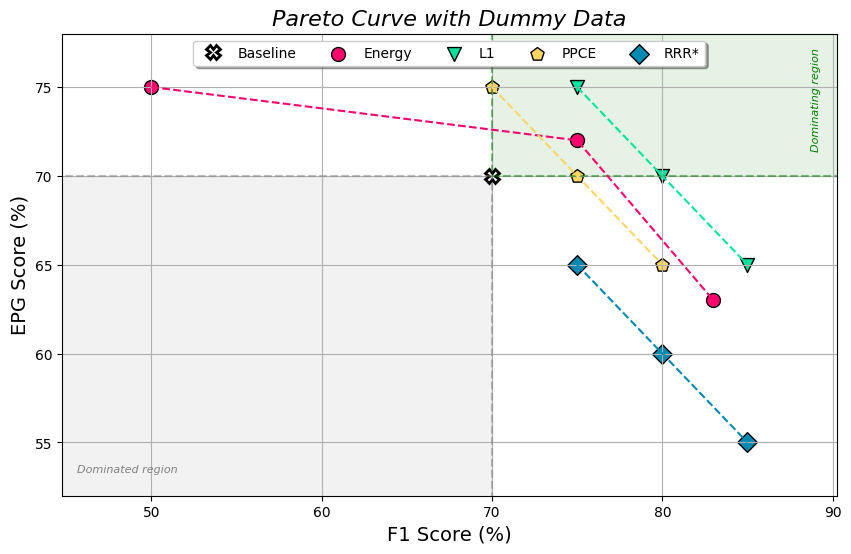

In [114]:
# Example usage
plot_pareto_curve(
    baseline_data=(70, 70),
    energy_data=[(50, 75), (75, 72), (83, 63)],
    l1_data=[(75, 75), (80, 70), (85, 65)],
    ppce_data=[(70, 75), (75, 70), (80, 65)],
    rrr_data=[(75, 65), (80, 60), (85, 55)],
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='Pareto Curve with Dummy Data'    
)

In [115]:
def load_data_from_folders(root_folder, metrics=('F-Score', 'BB-Loc')):
    energy_data = []
    l1_data = []
    ppce_data = []
    rrr_data = []

    # Check if metrics are valid
    if metrics[0] not in ['F-Score', 'BB-Loc', 'BB-IoU']:
        raise ValueError('Invalid metric: ' + metrics[0])
    
    if metrics[1] not in ['F-Score', 'BB-Loc', 'BB-IoU']:
        raise ValueError('Invalid metric: ' + metrics[1])

    for subdir, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith('.npz'):
                filepath = os.path.join(subdir, file)
                data = np.load(filepath)

                if 'energy' in file.lower():
                    energy_data.append((data[metrics[0]], data[metrics[1]]))
                elif 'l1' in file.lower():
                    l1_data.append((data[metrics[0]], data[metrics[1]]))
                elif 'ppce' in file.lower():
                    ppce_data.append((data[metrics[0]], data[metrics[1]]))
                elif 'rrr' in file.lower():
                    rrr_data.append((data[metrics[0]], data[metrics[1]]))

    # Return sorted data
    return sorted(energy_data), sorted(l1_data), sorted(ppce_data), sorted(rrr_data)

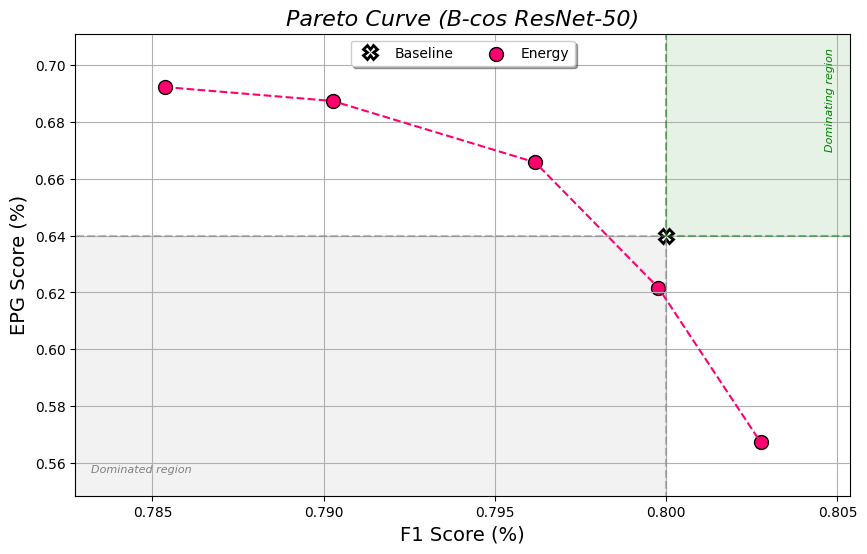

In [116]:
# Bcos - F-Score, BB-Loc (EPG) Pareto Curve
root_folder = '/home/roan/Documents/FACTifAI_2024_3/metrics_per_model_bcos'
energy_data, l1_data, ppce_data, rrr_data = load_data_from_folders(root_folder, metrics=('F-Score', 'BB-Loc'))

plot_pareto_curve(
    baseline_data=(0.80, 0.64),
    energy_data=energy_data,
    l1_data=l1_data,
    ppce_data=ppce_data,
    rrr_data=rrr_data,
    x_label='F1 Score (%)',
    y_label='EPG Score (%)',
    title='Pareto Curve (B-cos ResNet-50)'
)

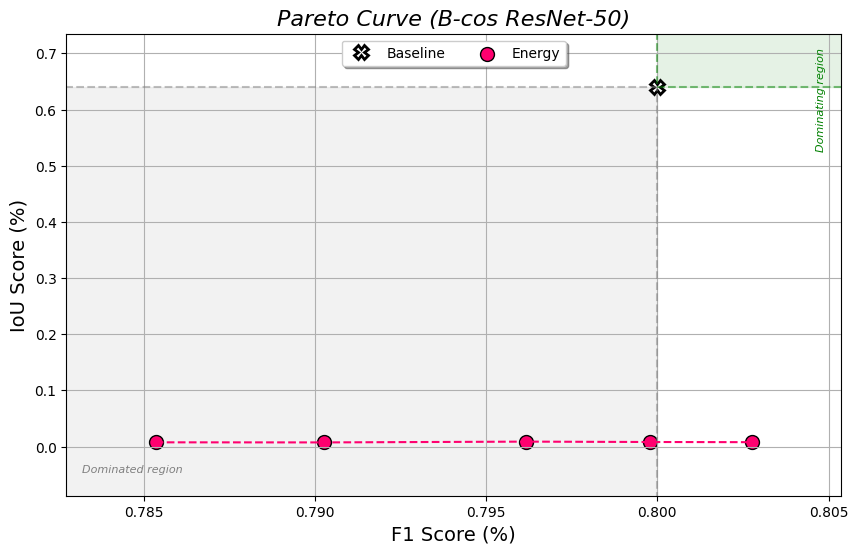

In [117]:
# Bcos - F-Score, BB-Loc (EPG) Pareto Curve
root_folder = '/home/roan/Documents/FACTifAI_2024_3/metrics_per_model_bcos'
energy_data, l1_data, ppce_data, rrr_data = load_data_from_folders(root_folder, metrics=('F-Score', 'BB-IoU'))

plot_pareto_curve(
    baseline_data=(0.80, 0.64),
    energy_data=energy_data,
    l1_data=l1_data,
    ppce_data=ppce_data,
    rrr_data=rrr_data,
    x_label='F1 Score (%)',
    y_label='IoU Score (%)',
    title='Pareto Curve (B-cos ResNet-50)'
)